In [1]:
# Initial Setup and Data Loading
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import plotly.express as px
%matplotlib inline

# Set style for visualizations
plt.style.use('ggplot')
sns.set_palette("husl")

# Load the dataset
df = pd.read_csv('covid 19 dataset.csv', parse_dates=['date'])

# Display basic information
print("Dataset shape:", df.shape)
df.info()

Dataset shape: (3000, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   date                     3000 non-null   datetime64[ns]
 1   continent                3000 non-null   object        
 2   location                 3000 non-null   object        
 3   total_cases              3000 non-null   int64         
 4   new_cases                3000 non-null   int64         
 5   total_deaths             3000 non-null   int64         
 6   new_deaths               3000 non-null   int64         
 7   total_tests              3000 non-null   int64         
 8   new_tests                3000 non-null   int64         
 9   positive_rate            3000 non-null   float64       
 10  tests_per_case           3000 non-null   float64       
 11  total_vaccinations       3000 non-null   int64         
 12  people_v

In [2]:
# 2. Data Cleaning and Preparation
# Check for missing values
print("Missing values per column:")
print(df.isnull().sum().sort_values(ascending=False))

# Drop columns with too many missing values (threshold can be adjusted)
threshold = len(df) * 0.7  # Keep columns with at least 30% data
df_clean = df.dropna(thresh=threshold, axis=1)

# Fill missing numeric values with median
numeric_cols = df_clean.select_dtypes(include=np.number).columns
df_clean[numeric_cols] = df_clean[numeric_cols].fillna(df_clean[numeric_cols].median())

# Convert date to datetime if not already done
df_clean['date'] = pd.to_datetime(df_clean['date'])

# Add some useful derived columns
df_clean['mortality_rate'] = df_clean['total_deaths'] / df_clean['total_cases']
df_clean['case_fatality_rate'] = df_clean['new_deaths'] / df_clean['new_cases']
df_clean['vaccination_rate'] = df_clean['people_vaccinated'] / df_clean['population']

# Display cleaned data info
df_clean.head()

Missing values per column:
date                       0
hosp_patients              0
cardiovasc_death_rate      0
extreme_poverty            0
gdp_per_capita             0
aged_70_older              0
aged_65_older              0
median_age                 0
population_density         0
population                 0
stringency_index           0
reproduction_rate          0
icu_patients               0
people_fully_vaccinated    0
continent                  0
people_vaccinated          0
total_vaccinations         0
tests_per_case             0
positive_rate              0
new_tests                  0
total_tests                0
new_deaths                 0
total_deaths               0
new_cases                  0
total_cases                0
location                   0
diabetes_prevalence        0
dtype: int64


date      continent location  total_cases  new_cases  total_deaths  \
0 2021-11-19           Asia    India      6423388       2490        107051   
1 2021-09-12  North America   Russia      6550634       6980        481184   
2 2020-04-20         Europe   Canada      4304572       9134         15116   
3 2022-10-16           Asia  Germany      2234489       7661         20045   
4 2021-05-15         Europe      USA      9958614       1724        419543   

   new_deaths  total_tests  new_tests  positive_rate  ...  median_age  \
0         323     60016385       7386       0.904377  ...   49.883751   
1         697     28666409       6862       0.525850  ...   30.126823   
2         325     80352550      40108       0.791575  ...   22.648063   
3         624     89212990      91788       0.115291  ...   42.951109   
4         824      5364240      75023       0.927643  ...   26.414731   

   aged_65_older  aged_70_older  gdp_per_capita  extreme_poverty  \
0       8.649395      16.052063    44313.199950        20.827286   
1       8.957854       4.423022     8196.945011        20.478579   
2       9.336778      18.776372    52607.000060        11.924664   
3       5.321894      10.526520    23297.985040         4.591400   
4      19.321761      15.889173    56126.828890         5.431330   

   cardiovasc_death_rate  diabetes_prevalence  mortality_rate  \
0             177.832655            16.296474        0.016666   
1             470.991420             8.579170        0.073456   
2             415.880908            14.989789        0.003512   
3             643.510444            18.084096        0.008971   
4             451.846790             5.971409        0.042129   

   case_fatality_rate  vaccination_rate  
0            0.129719          0.028416  
1            0.099857          0.592322  
2            0.035581          0.059836  
3            0.081452          0.012724  
4            0.477958          0.070896  

[5 rows x 30 columns]

Summary statistics for numeric columns:


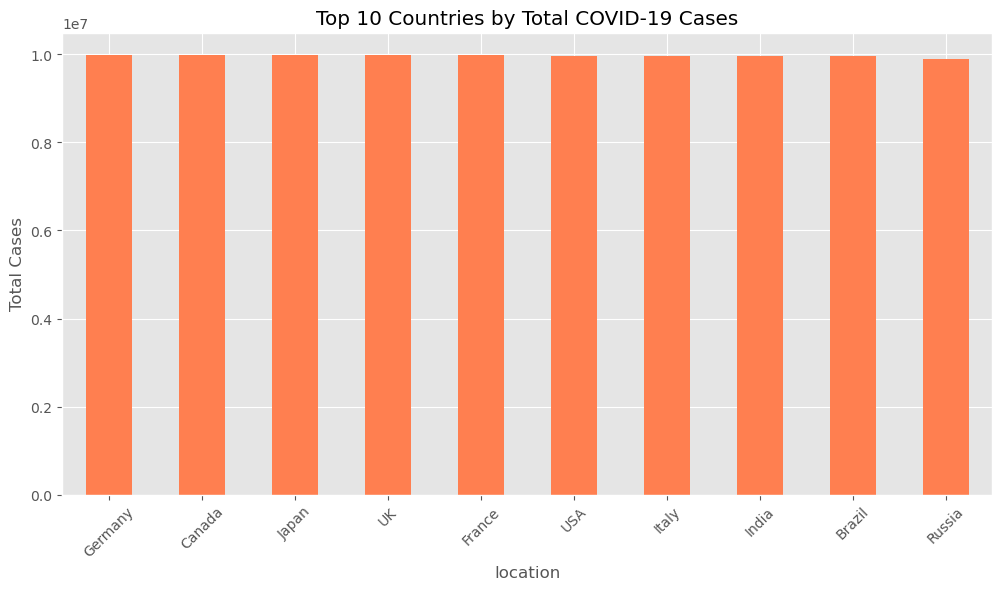

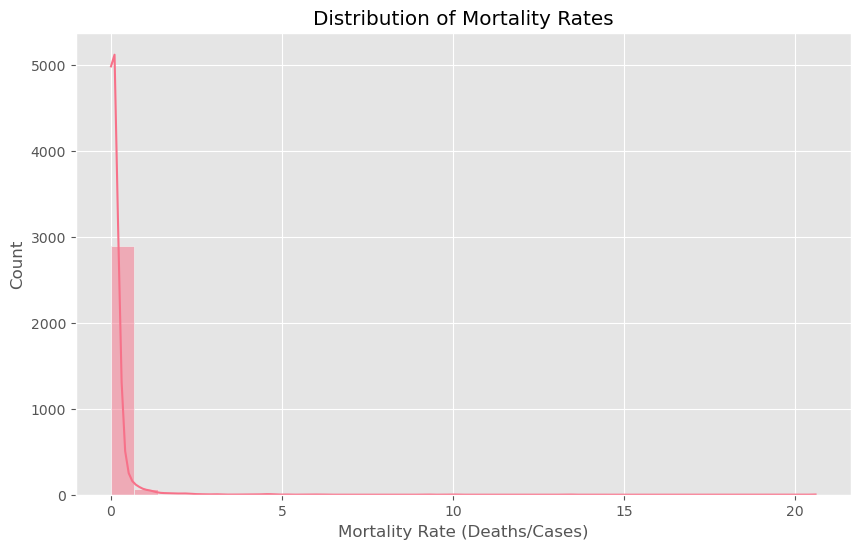

In [13]:
# 3. Exploratory Data Analysis (EDA)
# Summary statistics
print("Summary statistics for numeric columns:")
df_clean.describe().T

# Top 10 countries by total cases
top_countries = df_clean.groupby('location')['total_cases'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(12,6))
top_countries.plot(kind='bar', color='coral')
plt.title('Top 10 Countries by Total COVID-19 Cases')
plt.ylabel('Total Cases')
plt.xticks(rotation=45)
plt.show()

# Mortality rate distribution
plt.figure(figsize=(10,6))
sns.histplot(df_clean['mortality_rate'].dropna(), bins=30, kde=True)
plt.title('Distribution of Mortality Rates')
plt.xlabel('Mortality Rate (Deaths/Cases)')
plt.show()

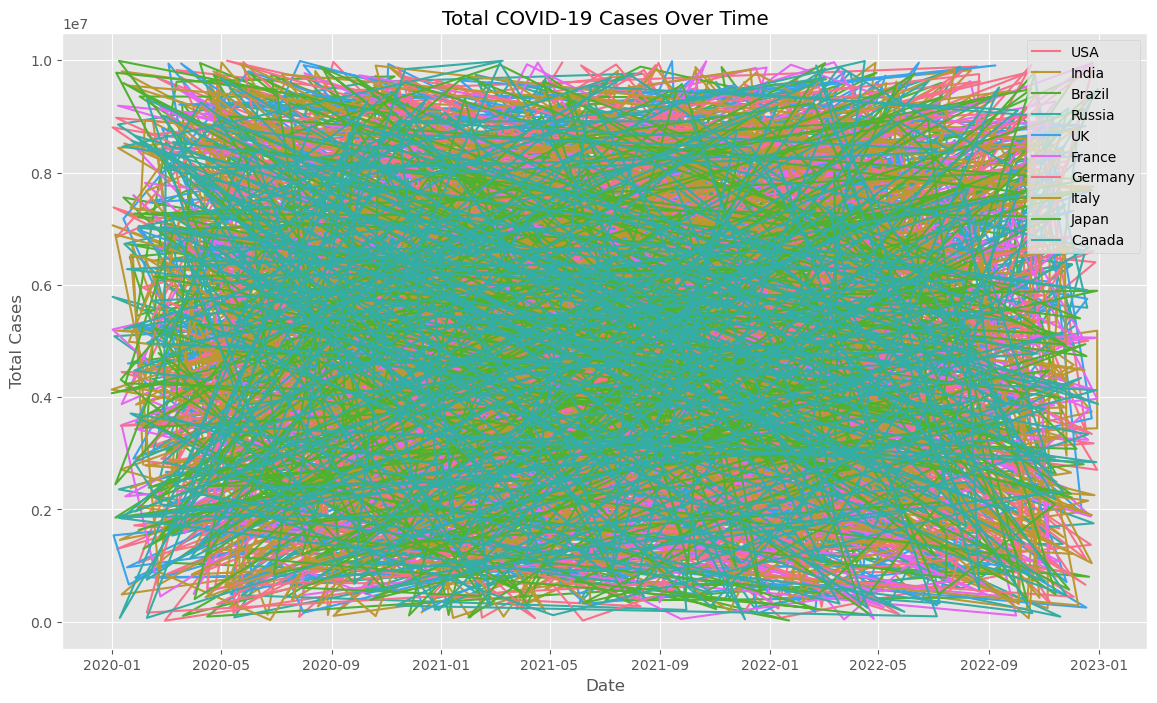

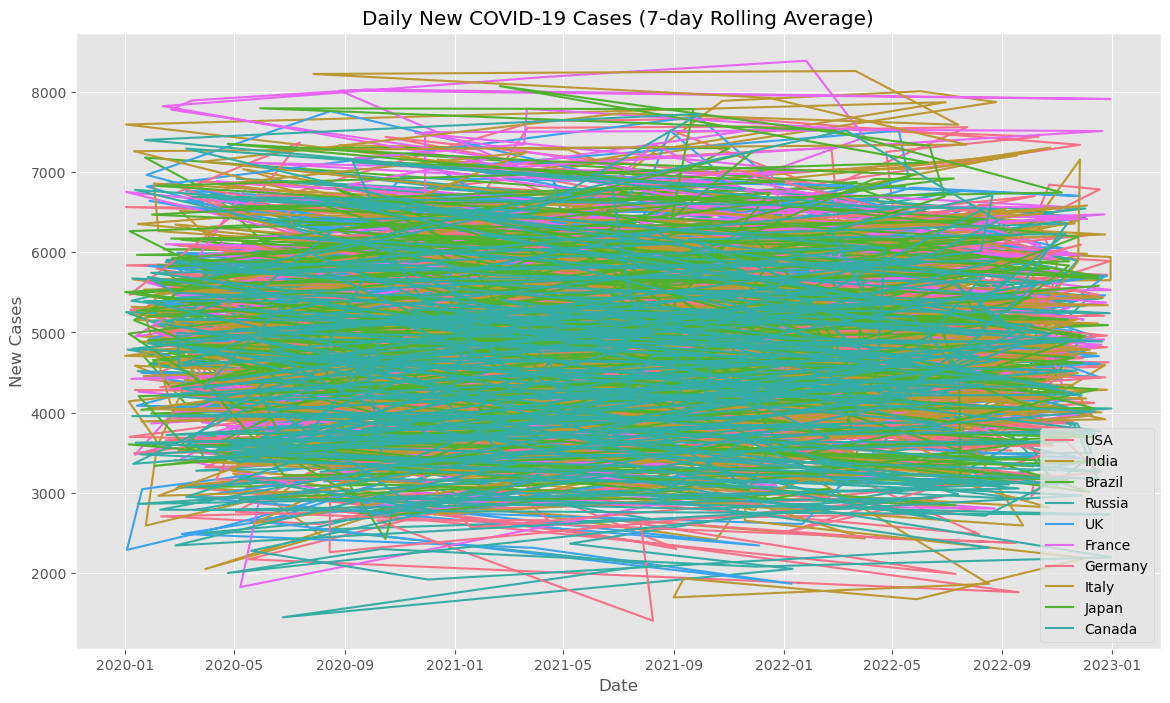

In [15]:
# 4. Time Series Analysis
# Select some key countries for time series analysis
key_countries = ['USA', 'India', 'Brazil', 'Russia', 'UK', 'France', 'Germany', 'Italy', 'Japan', 'Canada']

# Filter data for these countries
df_key = df_clean[df_clean['location'].isin(key_countries)]

# Plot total cases over time
plt.figure(figsize=(14,8))
for country in key_countries:
    country_data = df_key[df_key['location'] == country]
    plt.plot(country_data['date'], country_data['total_cases'], label=country)
plt.title('Total COVID-19 Cases Over Time')
plt.ylabel('Total Cases')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

# Plot new cases (7-day rolling average to smooth)
plt.figure(figsize=(14,8))
for country in key_countries:
    country_data = df_key[df_key['location'] == country]
    rolling_avg = country_data['new_cases'].rolling(7).mean()
    plt.plot(country_data['date'], rolling_avg, label=country)
plt.title('Daily New COVID-19 Cases (7-day Rolling Average)')
plt.ylabel('New Cases')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

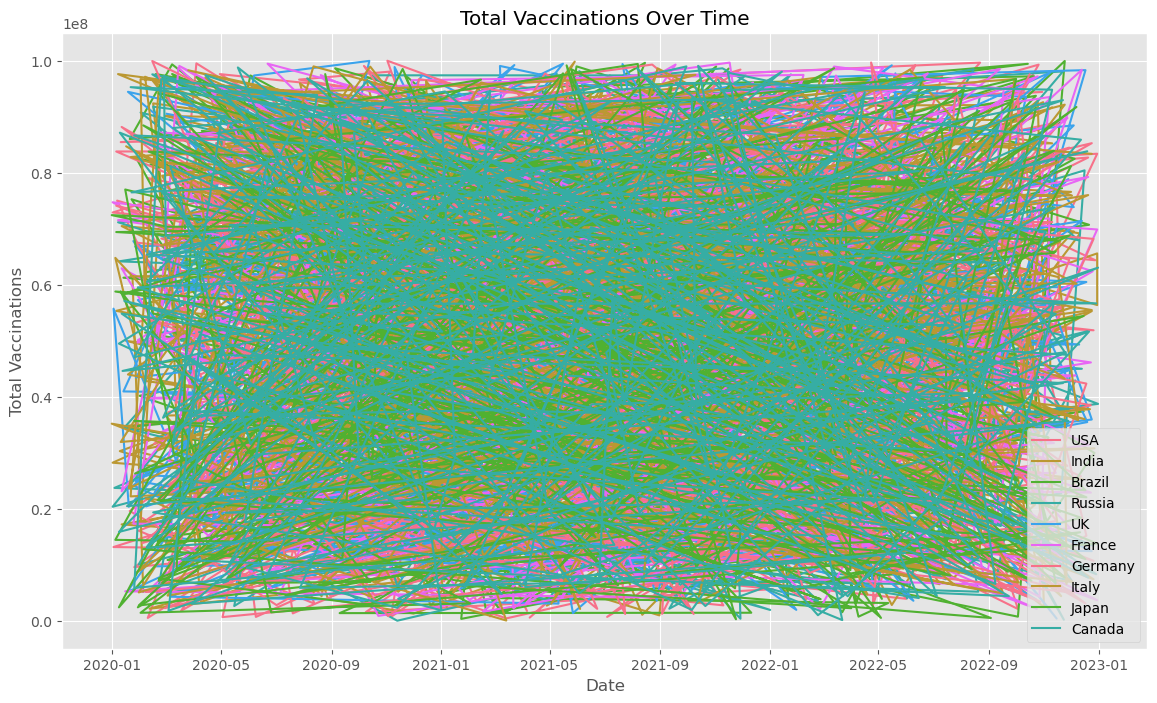

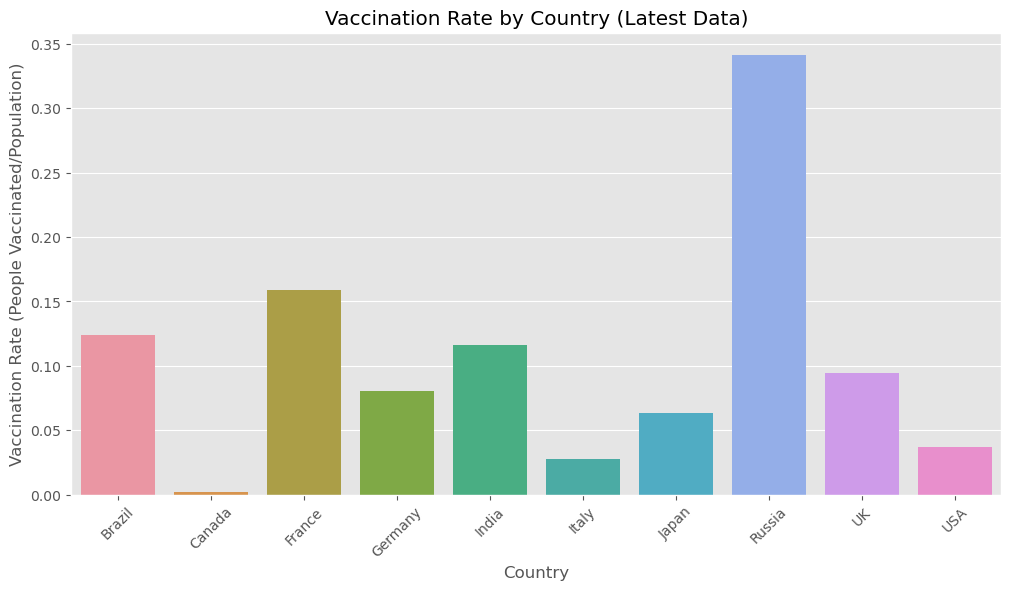

In [5]:
# 5. Vaccination Analysis
# Vaccination progress over time
plt.figure(figsize=(14,8))
for country in key_countries:
    country_data = df_key[df_key['location'] == country]
    plt.plot(country_data['date'], country_data['total_vaccinations'], label=country)
plt.title('Total Vaccinations Over Time')
plt.ylabel('Total Vaccinations')
plt.xlabel('Date')
plt.legend()
plt.grid(True)
plt.show()

# Current vaccination status by country
latest_data = df_key.sort_values('date').groupby('location').last()
plt.figure(figsize=(12,6))
sns.barplot(x='location', y='vaccination_rate', data=latest_data.reset_index())
plt.title('Vaccination Rate by Country (Latest Data)')
plt.ylabel('Vaccination Rate (People Vaccinated/Population)')
plt.xlabel('Country')
plt.xticks(rotation=45)
plt.show()

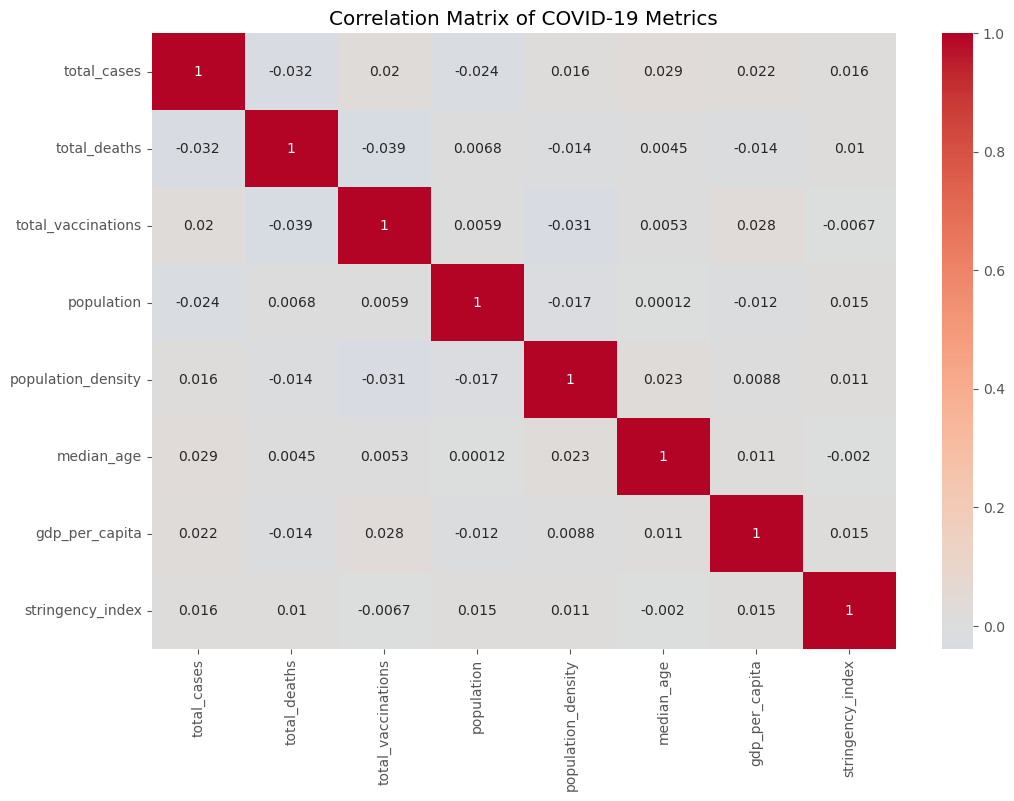

In [6]:
# Select relevant columns for correlation
corr_cols = ['total_cases', 'total_deaths', 'total_vaccinations', 'population', 
             'population_density', 'median_age', 'gdp_per_capita', 'stringency_index']

# Calculate correlation matrix
corr_matrix = df_clean[corr_cols].corr()

# Plot heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of COVID-19 Metrics')
plt.show()

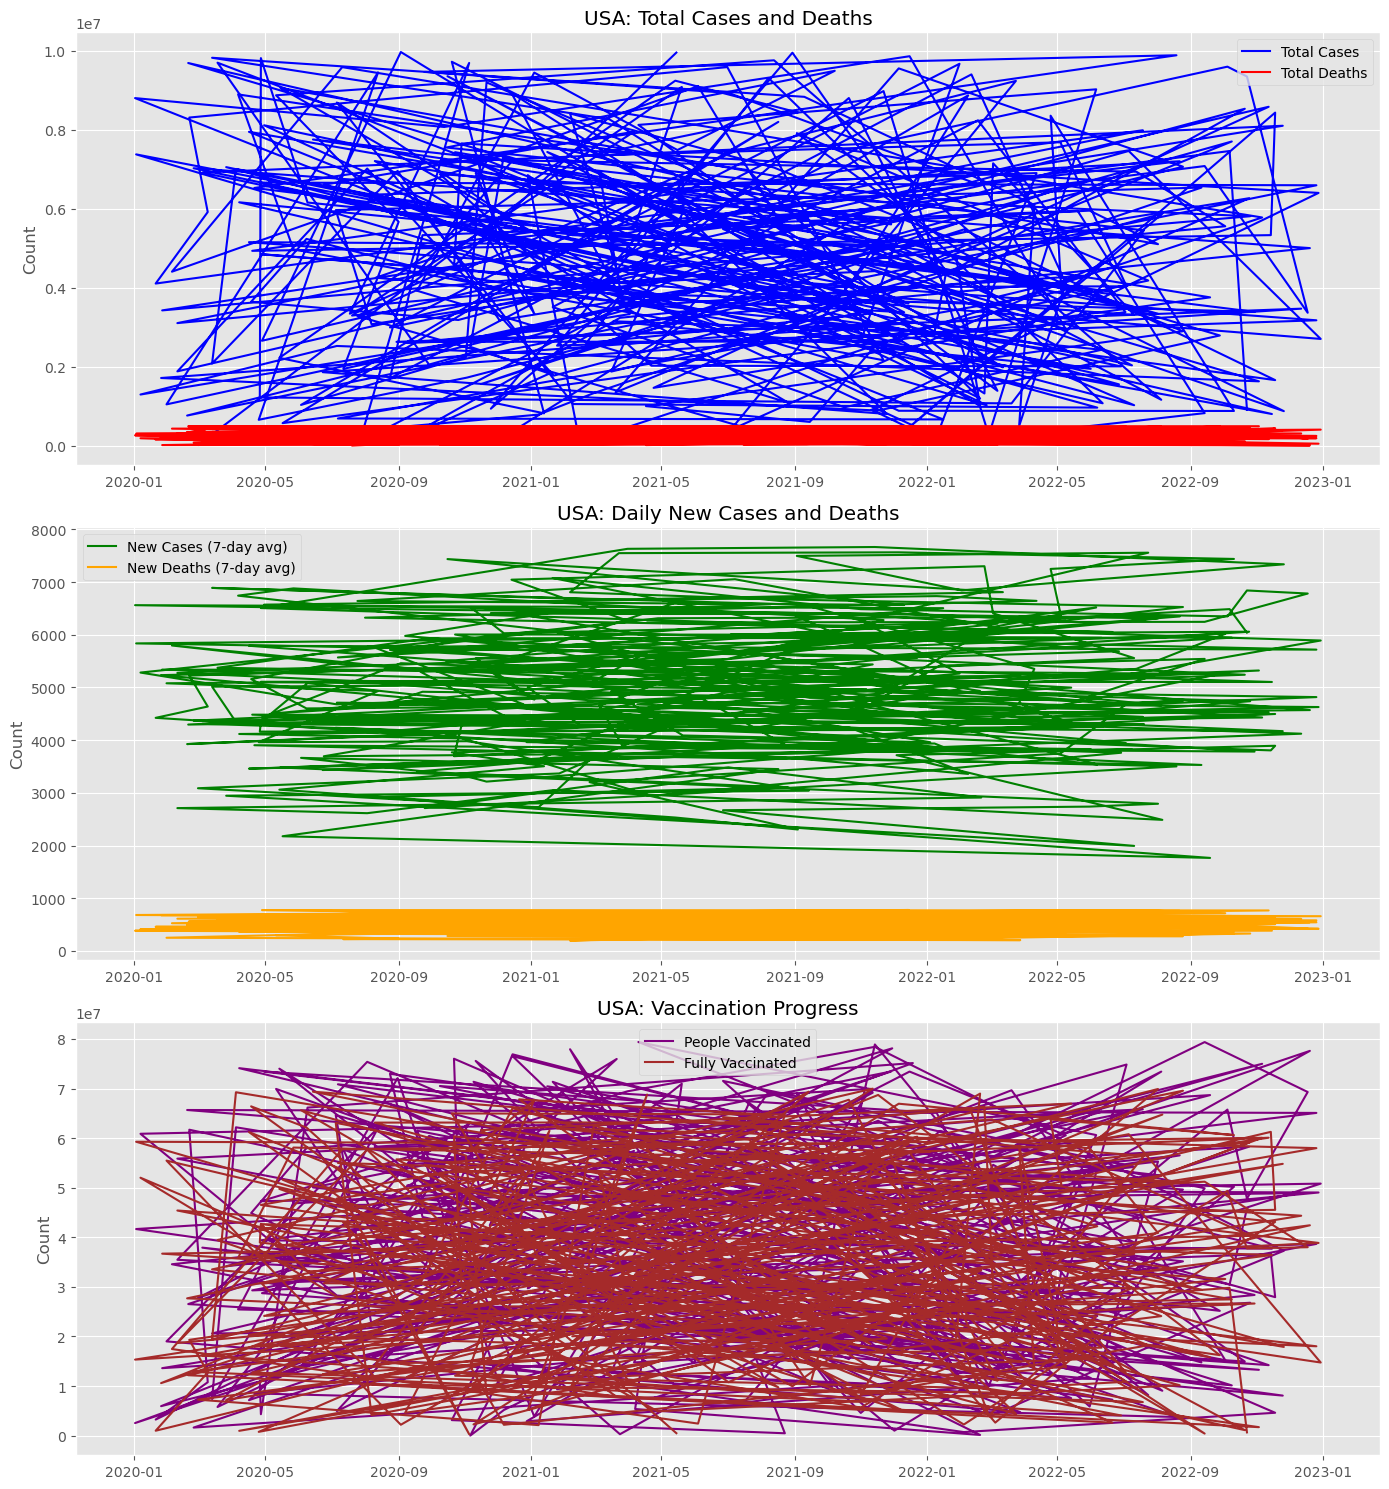

In [7]:
# Function to plot country-specific data
def plot_country_data(country_name):
    country_df = df_clean[df_clean['location'] == country_name]
    
    fig, axes = plt.subplots(3, 1, figsize=(14, 15))
    
    # Total cases and deaths
    axes[0].plot(country_df['date'], country_df['total_cases'], label='Total Cases', color='blue')
    axes[0].plot(country_df['date'], country_df['total_deaths'], label='Total Deaths', color='red')
    axes[0].set_title(f'{country_name}: Total Cases and Deaths')
    axes[0].set_ylabel('Count')
    axes[0].legend()
    axes[0].grid(True)
    
    # New cases and deaths (7-day average)
    axes[1].plot(country_df['date'], country_df['new_cases'].rolling(7).mean(), 
                 label='New Cases (7-day avg)', color='green')
    axes[1].plot(country_df['date'], country_df['new_deaths'].rolling(7).mean(), 
                 label='New Deaths (7-day avg)', color='orange')
    axes[1].set_title(f'{country_name}: Daily New Cases and Deaths')
    axes[1].set_ylabel('Count')
    axes[1].legend()
    axes[1].grid(True)
    
    # Vaccinations
    axes[2].plot(country_df['date'], country_df['people_vaccinated'], 
                 label='People Vaccinated', color='purple')
    axes[2].plot(country_df['date'], country_df['people_fully_vaccinated'], 
                 label='Fully Vaccinated', color='brown')
    axes[2].set_title(f'{country_name}: Vaccination Progress')
    axes[2].set_ylabel('Count')
    axes[2].legend()
    axes[2].grid(True)
    
    plt.tight_layout()
    plt.show()

# Example usage
plot_country_data('USA')

In [8]:
# 8. Advanced Visualizations 
# Choropleth map of total cases (requires plotly)
if 'plotly' in globals():
    latest_date = df_clean['date'].max()
    latest_data = df_clean[df_clean['date'] == latest_date]
    
    fig = px.choropleth(latest_data, 
                        locations="location",
                        locationmode='country names',
                        color="total_cases",
                        hover_name="location",
                        color_continuous_scale=px.colors.sequential.Plasma,
                        title=f'Total COVID-19 Cases by Country as of {latest_date.date()}')
    fig.show()
else:
    print("Plotly not available. Install with: pip install plotly")

Plotly not available. Install with: pip install plotly


In [9]:
# 9. Key Insights and Summary
# Calculate some key metrics
latest_global = df_clean[df_clean['date'] == df_clean['date'].max()]

total_cases = latest_global['total_cases'].sum()
total_deaths = latest_global['total_deaths'].sum()
total_vaccinations = latest_global['total_vaccinations'].sum()

print(f"Global Summary as of {latest_global['date'].iloc[0].date()}:")
print(f"Total Cases: {total_cases:,.0f}")
print(f"Total Deaths: {total_deaths:,.0f}")
print(f"Total Vaccinations: {total_vaccinations:,.0f}")

# Top 5 countries by mortality rate
high_mortality = latest_global[['location', 'mortality_rate']].sort_values('mortality_rate', ascending=False).head(5)
print("\nTop 5 Countries by Mortality Rate:")
print(high_mortality)

# Top 5 countries by vaccination rate
high_vaccination = latest_global[['location', 'vaccination_rate']].sort_values('vaccination_rate', ascending=False).head(5)
print("\nTop 5 Countries by Vaccination Rate:")
print(high_vaccination)

Global Summary as of 2022-12-31:
Total Cases: 13,368,986
Total Deaths: 277,703
Total Vaccinations: 101,761,787

Top 5 Countries by Mortality Rate:
     location  mortality_rate
2903   Canada        0.036537
2137   Russia        0.014330

Top 5 Countries by Vaccination Rate:
     location  vaccination_rate
2137   Russia          0.341581
2903   Canada          0.001980


In [10]:
# 9 Exporting Results
# Save cleaned data to new CSV
df_clean.to_csv('cleaned_covid_data.csv', index=False)

# Save visualizations
# (You would save each figure individually using plt.savefig() before showing them)